# Final Exam Review 

*December 18th 11:30 AM - 1:30 PM North 1001C*
[Notesheet1](../attachments/su23_final_reference_sheet_p1.pdf)
[Notesheet2](../attachments/su23_final_reference_sheet_p2.pdf)
[Notesheet3](../attachments/su23_final_reference_sheet_p3.pdf)
[Notesheet4](../attachments/su23_final_reference_sheet_p4.pdf)
[Notesheet5](../attachments/su23_final_reference_sheet_p5.pdf)
[Notesheet6](../attachments/su23_final_reference_sheet_p6.pdf)
## Exam will cover 
### Data Science Lifecycle: 
  - Question Formulation, 
  - Data Acquisition and Cleaning, 
  - Exploratory Data Analysis, Modeling, and Inference
    
### Stats \& Math:
  - Data Scope, Big Data, Accuracy, 
  - Expectation, Variance, Correlation, Residuals & Sampling, Distributions, Probability Mass Functions, Confidence Intervals
  - Hypothesis Testing, Central Limit Theorem, Vectors, Matrices, Eigenvectors & Eigenvalues, Intrinsic Dimensionality, Principal Components Analysis (PCA), Multidimensional Scaling (MDS)
    
### Modeling: 
 - Multiple Linear Regression, Loss Functions: Mean Squared and Mean Absolute Error, 
 - Imputation, Feature Engineering: Categorical Encoding, Polynomial Models, Cross Validation, Ridge Regularization (L2) & Lasso Regularization (L1); 
 - Bias-Variance Tradeoff, Fitting Models: Convexity, Validating, Gradient Descent, 
 - Classifiers: Logistic Model, SVM's, Naive Bayes, Decision Trees/Random Forests;  
 - Supervised vs. Unsupervised Learning; 
 - Clustering: K-Means, Gaussian Mixture Models, Hierarchical Clustering, Spectral Clustering

### Python Tools:  
dictionaries, I/O, keyword parameters,  linting, Pandas, Lambda Expressions, apply, List comprehensions, zips, Testing Frameworks (pytest), Visualizing in plt \& sns, Time-series, pickling, GIS formats \& vis, Choropleth maps, Voronoi Diagrams, Visualization Principles, Regular Expressions, SQL in Python

## Outline of final written exam
- Total of 10 questions, adding up to 100 points.
- datasets: MNIST, Tips, Icecream, NYCopen Schools, EMS, FRED (federal reserve economic data), Taxi (5 out of 7) and one new dataset. 
- Each question have number of questions ranging from 2 to 5 sub-questions. These are multiple choice (one question have more than one correct answer), fill-in box code, and short answer questions.
  ### 1. Features and one hot encoding
	- variable types: continuous, nominal, ordinal
	- one hot encoding: converting categorical variables into binary features

In [18]:
# Libraries
import pandas as pd
# Example dataframe
df = pd.DataFrame({'color': ['red', 'blue', 'green']})
# Encoding categorical variable using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['color'], dtype=int)
print(df_encoded)

   color_blue  color_green  color_red
0           0            0          1
1           1            0          0
2           0            1          0


Write python to plot histogram of the following data: [1,2,2,3,3,3,4,4,4,4]

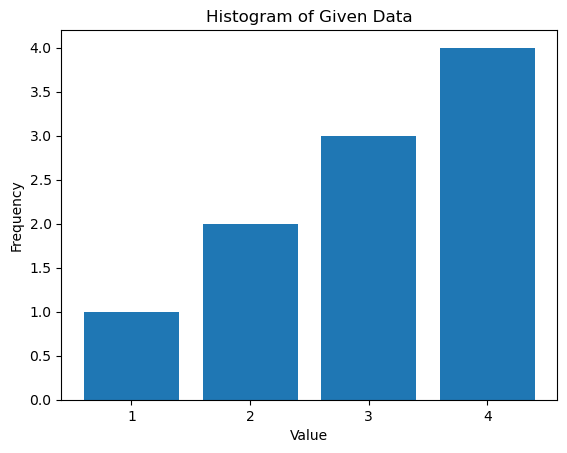

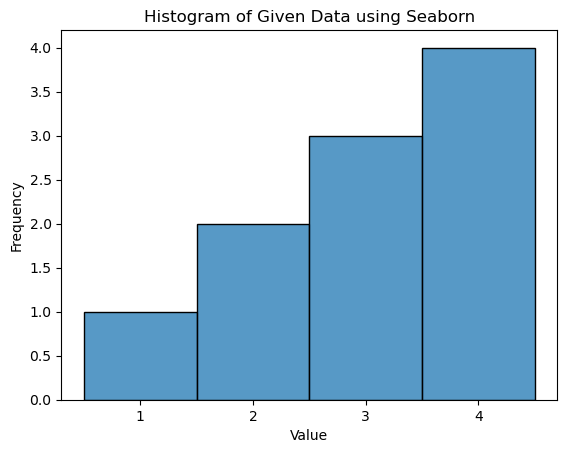

In [2]:
arr = [1,2,2,3,3,3,4,4,4,4]

import matplotlib.pyplot as plt
plt.hist(arr, bins=range(1,6), align='left', rwidth=0.8)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Given Data')
plt.xticks(range(1,5))
plt.show()

import seaborn as sns
#plotting arr using seaborn
sns.histplot(arr, bins=range(1,6), discrete=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Given Data using Seaborn')
plt.xticks(range(1,5))
plt.show()

  ### 2. Easy data wrangling with Pandas, e.g., 
   
   a. `df[df['some_column] > some_value]` means filter rows where some_column > some_value 

   b. `df.groupby('some_column').mean()` means group by some_column and compute mean for each group

   c. `df['new_column'] = df['some_column1'] + df['some_column2']` means create new column as sum of two columns

   d. `pd.read_csv('some_file.csv')` means read csv file into pandas dataframe
   

  ### 3. Cleaning data: Regex and feature engineering

Dealing with missing values, e.g.,
   - dropping rows/columns with missing values. df.dropna(), df['column'].dropna(),df[some_column'].fillna(value). *hint: df.dropna() deletes rows with any missing values by default*    

In [19]:
df = pd.DataFrame({'color': ['red', 'blue', 'green', None]})
print(df.dropna())

df['color_filled_unknown'] = df['color'].fillna('unknown')
print(df)

df['color_filled_red'] = df['color'].fillna('red')
print(df)

   color
0    red
1   blue
2  green
   color color_filled_unknown
0    red                  red
1   blue                 blue
2  green                green
3   None              unknown
   color color_filled_unknown color_filled_red
0    red                  red              red
1   blue                 blue             blue
2  green                green            green
3   None              unknown              red


   - filling missing values with specific value or mean/median/mode of the column. df['column'].fillna(value), df['column'].fillna(df['column'].mean())
   - feature engineering: creating new features from existing ones, e.g., extracting year/month/day from date column, creating binary features from categorical columns, e.g.,

In [20]:
df = pd.DataFrame({'time': [1, 2, 3, 4, 5], 'value': [20190315, 20251201, 20200102, 19900220, 20200618]})
df['datetime'] = pd.to_datetime(df['value'], format='%Y%m%d')
print(df)
print(f"-"*20)
df['year'] = df['value'].astype(str).str[:4].astype(int)
df['month'] = df['value'].astype(str).str[4:6].astype(int)
df['day'] = df['value'].astype(str).str[6:8].astype(int)
print(df)
print(f"-"*20)
#sorting df by 'value' column in descending order
df_sorted = df.sort_values(by='value', ascending=False)
print(df_sorted)
print(f"-"*20)
#resetting index after sorting
df_sorted_reset = df_sorted.reset_index(drop=True)
print(df_sorted_reset)

   time     value   datetime
0     1  20190315 2019-03-15
1     2  20251201 2025-12-01
2     3  20200102 2020-01-02
3     4  19900220 1990-02-20
4     5  20200618 2020-06-18
--------------------
   time     value   datetime  year  month  day
0     1  20190315 2019-03-15  2019      3   15
1     2  20251201 2025-12-01  2025     12    1
2     3  20200102 2020-01-02  2020      1    2
3     4  19900220 1990-02-20  1990      2   20
4     5  20200618 2020-06-18  2020      6   18
--------------------
   time     value   datetime  year  month  day
1     2  20251201 2025-12-01  2025     12    1
4     5  20200618 2020-06-18  2020      6   18
2     3  20200102 2020-01-02  2020      1    2
0     1  20190315 2019-03-15  2019      3   15
3     4  19900220 1990-02-20  1990      2   20
--------------------
   time     value   datetime  year  month  day
0     2  20251201 2025-12-01  2025     12    1
1     5  20200618 2020-06-18  2020      6   18
2     3  20200102 2020-01-02  2020      1    2
3     1  20

regular expresion e.g.,

```python 
words = ['cat', 'car', 'dog', 'deer', 'elephant']
``` 
what is the regex to match words that start with 'c'? 

pattern = r'^c'

  ### 4. Probability, sampling, inference
   - correlation (positive, negative, no correlation)
   - sampling methods (random, stratified, cluster)
   - hypothesis testing (null and alternative hypotheses, p-values, significance levels)
   - independent variables vs. dependent variables
  ### 5. Regularization and 6. Classifiers
   - L1 and L2 regularization differences
   - when to use L1 vs. L2
   - linear models and polynomial models
   - overfitting and underfitting
   - bias-variance tradeoff 
   - cross validation
   - confusion matrix and related metrics (accuracy, precision, recall, F1 score)
  ### 7. PCA, dimension reduction
   - how to calculate principal components' slopes
   - property of orthogonality of principal components
   - elbow method to choose number of principal components
   - scikit-learn PCA implementation
  ### 8. Clustering
   - k-means clustering algorithm 
   - choosing number of clusters (elbow method, silhouette score)
   - distance metrics (Euclidean, Manhattan, Cosine)

  ### 9. Overview of models
   - differences between regression and classification models
   - supervised vs. unsupervised learning
   - common algorithms for regression (linear regression, ridge, lasso) and classification (logistic regression, naive bayes, decision trees, random forests, SVMs)
  ### 10.    Python and sql
   - basic SQL commands (SELECT, FROM, WHERE, JOIN, GROUP BY, ORDER BY)
   - executing SQL queries in Python using libraries like sqlite3 or SQLAlchemy
   - reading SQL query results into pandas DataFrames using pd.read_sql_query()
## Review midterm, classworks, homework assignments